# Other Models

Use TF Kernel for this notebook

In [1]:
import cv2
import time
import dlib
import matplotlib.pyplot as plt

from mtcnn import MTCNN
import mediapipe as mp
import torch

## Model 1 - DeepFace Model 
Can't use as there is no face detection model

In [19]:
# from deepface import DeepFace
# import cv2

In [20]:
# verification = DeepFace.verify(img1_path = 'samples/sample_8.png', img2_path = 'samples/sample_9.jpg')


In [21]:
# detectors = ["opencv", "ssd", "mtcnn", "dlib", "retinaface"] 
# img = DeepFace.detectFace('samples/sample_8.png', detector_backend = detectors[4])

In [22]:
# backends = ["opencv", "ssd", "mtcnn", "dlib", "retinaface"] 

In [23]:
# face_objs = DeepFace.extract_faces(img_path = 'samples/sample_8.png', 
#         detector_backend = backends[0], 
#         enforce_detection = False
# )

In [24]:
# face_objs[0]['facial_area']

In [25]:
# cv2.imshow('Face', image)

In [26]:
# face_objs[0]['face']

## MTCNN

In [494]:
# image = cv2.imread('samples/sample_4.png')
# image = cv2.imread('samples/sample_7.png') 
# image = cv2.imread('samples/sample_8.png')
# image = cv2.imread('samples/sample_9.jpg')
image = cv2.imread('samples/sample_10.png')

In [495]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [496]:
detector = MTCNN()
detected_boxes = detector.detect_faces(image_rgb)

1/1 [==============================] - 0s 61ms/step


In [497]:
detected_boxes[0]

{'box': [231, 641, 90, 116],
 'confidence': 0.9999805688858032,
 'keypoints': {'left_eye': (279, 684),
  'right_eye': (314, 687),
  'nose': (307, 711),
  'mouth_left': (281, 731),
  'mouth_right': (307, 734)}}

In [498]:
for face in detected_boxes:
    x, y, w, h = face['box']
    cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 2)

(-0.5, 963.5, 1629.5, -0.5)

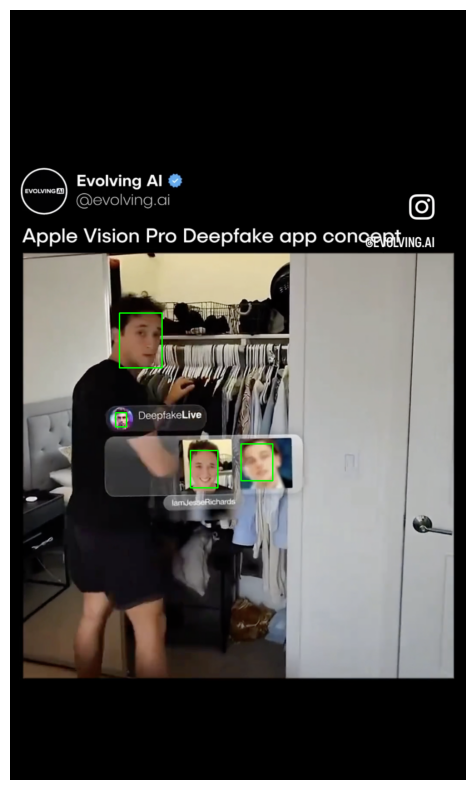

In [499]:
plt.figure(figsize=(20,10))
plt.imshow(image_rgb)
plt.axis('off')

## Model 3 - Mediapipe

In [9]:
# image = cv2.imread('samples/sample_4.png')
image = cv2.imread('samples/sample_7.png') 
# image = cv2.imread('samples/sample_8.png')
# image = cv2.imread('samples/sample_9.jpg')
# image = cv2.imread('samples/sample_10.png')

In [10]:
# Initialize MediaPipe Face Detection
mp_face_detection = mp.solutions.face_detection

In [11]:
# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [12]:
with mp_face_detection.FaceDetection(min_detection_confidence=1, model_selection=1) as face_detection:
    results = face_detection.process(image)

    # Check if faces were detected
    if results.detections:
        for detection in results.detections:
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, _ = image.shape
            x, y = int(bboxC.xmin * iw), int(bboxC.ymin * ih)
            w, h = int(bboxC.width * iw), int(bboxC.height * ih)
            cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)

I0000 00:00:1708333284.076632       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


(-0.5, 631.5, 1145.5, -0.5)

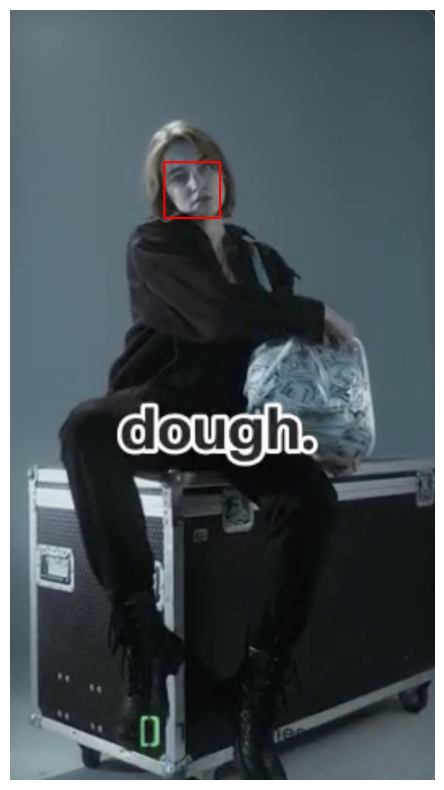

In [13]:
plt.figure(figsize=(20,10))
plt.imshow(image_rgb)
plt.axis('off')